# Transfer Learning with keras pretrained model- Xception 
This model has weights that have been pretrained on imagenet
More layers are added on top of the model.
Could use data augmentation for better results- I did not try that yet
This still need to be fine-tuned for better performance

There are other pretrained models we can try if this doesnt seem like it is working

Another thing that could be done is geting all the mixed dog breed images to arrays

Here are some links 
https://www.depends-on-the-definition.com/transfer-learning-for-dog-breed-identification/

https://github.com/booleanhunter/Deep-Learning-Projects/blob/master/Predict%20Dog%20Breeds/dog_app.ipynb


In [1]:
from keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from keras.models import Model, Input
from keras.preprocessing import image
from keras.applications import xception

Using TensorFlow backend.


In [5]:
import numpy as np
from sklearn import preprocessing

X_train = np.load(open('train_dataset.npy','rb'))
y_train = np.load(open('train_labels.npy','rb'))
X_test = np.load(open('test_dataset.npy','rb'))
y_test = np.load(open('test_labels.npy','rb'))
X_valid = np.load(open('valid_dataset.npy','rb'))
y_valid = np.load(open('valid_labels.npy','rb'))

y_valid = preprocessing.minmax_scale(y_valid, feature_range=(0,119))
y_train = preprocessing.minmax_scale(y_train, feature_range=(0,119))
y_test = preprocessing.minmax_scale(y_test, feature_range=(0,119))

# y_validInts = []

# for i in y_valid:
#     i = int(i)
#     y_validInts = i

from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes=None)
y_test = to_categorical(y_test, num_classes=None)
y_valid = to_categorical(y_valid, num_classes=None)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [6]:
print(y_valid[2000:4000])

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [7]:
bottleneck_features = np.load('DogXceptionData.npz')
train_Xception = bottleneck_features['train']
valid_Xception = bottleneck_features['valid']
test_Xception = bottleneck_features['test']

In [8]:
def extract_Xception(tensor):
    from keras.applications.xception import Xception, preprocess_input
    return Xception(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

On top of the pretrained model a fully connected layer with 1024 neurons and some Dropout is added.

In [9]:
NUM_CLASSES = 120
# create the base pre-trained model
base_model = xception.Xception(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
#Can try adding more layers
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
# and a logistic layer -- let's say we have NUM_CLASSES classes
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)


In [7]:
import datetime
#from keras.callbacks ModelCheckpoint
#Checkpoints still need to be added to model.fit call
# checkpoints
#filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
#callbacks_list = [checkpoint]

# Authors suggest setting step_size = (2-8) x (training iterations in epoch)



Can try fine tuning more layers
Can try using different optimizers

In [8]:
# #will freeze the first 116 layers and unfreeze the rest:
# for layer in model.layers[:116]:
#     layer.trainable = False
# for layer in model.layers[116:]:
#     layer.trainable = True

In [11]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional Xception layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
#Can try different optimizers like adam
optimizer = RMSprop(lr=0.001, rho=0.9)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])


In [12]:
# train the model on the new data for a few epochs
BATCH_SIZE = 32
EPOCHS = 1

#Checkpoints still need to be added to model.fit call
model.fit(X_train, y_train, validation_data=(X_valid, y_valid),epochs=EPOCHS, batch_size=BATCH_SIZE)

                      
# hist = model.fit(X_train, y_train,
#                            #callbacks=[early_stopping, model_checkpoint],
#                            validation_data=(X_valid, y_valid),epochs=EPOCHS, batch_size=BATCH_SIZE,callbacks=callbacks_list)

Train on 16464 samples, validate on 2058 samples
Epoch 1/1
   32/16464 [..............................] - ETA: 2:43:30 - loss: 6.1442 - acc: 0.0000e+00

KeyboardInterrupt: 

In [ ]:
bst_val_acc = max(history['val_acc'])
print("Best val acc: {:.1%}".format(bst_val_acc))

In [ ]:
#------uncomment here for checkpoints start
#filename = "yoursmallestlostweightfilehere"
#model.load_weights(filename)
#model.compile(loss='categorical_crossentropy', optimizer='adam')
#------end

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rotation_range=45,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.2,
#                                    zoom_range=0.25,
#                                    horizontal_flip=True,
#                                    fill_mode='nearest')

# test_datagen = ImageDataGenerator()

# Mixed Dog Breed Transfer Learning

In [ ]:
#Mixed dog breed data

In [ ]:
NUM_CLASSES = 120
# create the base pre-trained model
model = #best weight file here
x = model.output
#Can try adding more layers
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
# and a logistic layer -- let's say we have NUM_CLASSES classes
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# this is the model we will train
Mixed_model = Model(inputs=model.input, outputs=predictions)



In [ ]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional Xception layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
#Can try different optimizers like adam
optimizer = RMSprop(lr=0.001, rho=0.9)
Mixed_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])



In [ ]:
# train the model on the new data for a few epochs
BATCH_SIZE = 32
EPOCHS = 1

#Checkpoints still need to be added to model.fit call
Mixed_model.fit(X_train, y_train, validation_data=(X_valid, y_valid),epochs=EPOCHS, batch_size=BATCH_SIZE)

                      
# hist = model.fit(X_train, y_train,
#                            #callbacks=[early_stopping, model_checkpoint],
#          

In [ ]:
bst_val_acc = max(history['val_acc'])
print("Best val acc: {:.1%}".format(bst_val_acc))

In [ ]:
#------uncomment here for checkpoints start
#filename = "yoursmallestlostweightfilehere"
#model.load_weights(filename)
#model.compile(loss='categorical_crossentropy', optimizer='adam')
#------end

scores = Mixed_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Dog Breed Predictor

In [13]:
from scipy import ndimage, io, misc
from xml.dom import minidom
from matplotlib.pyplot import imshow
import cv2           
import matplotlib.pyplot as plt  
import imageio
%matplotlib inline        
from keras.preprocessing import image
from keras.preprocessing import image                  
from tqdm import tqdm
import pandas as pd
from glob import glob
from sklearn import preprocessing
from keras.applications.xception import Xception, preprocess_input, decode_predictions


In [14]:
configfiles = glob('/Users/juliagoyco/Desktop/Final_Deep_Learning/Images/*')#, recursive=True)
#dog_names = [item[10:-1] for item in configfiles]
import re
pattern = re.compile("n([0-9]*)-([\w]*)")

#print(pattern.search("n02085936-Maltese_dog").group(2))
dog_names =[]
for fname in configfiles:
    pattern = re.compile("n([0-9]*)-([\w]*)")
    if not pattern: continue
    dog_names=dog_names+[pattern.search(fname).group(2)] # You can append the result to a list



In [15]:
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    print(x.shape)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)


In [16]:
def display_image(img_path):
    a = imageio.imread(img_path)[:,:,:3]
    imshow(a)

In [17]:
def detect_dog(model, image_path):
    tensor = path_to_tensor(image_path)
    print(tensor.shape)
    bottleneck_features = extract_Xception(tensor)
    print(bottleneck_features.shape)
    predicted_vector = model.predict(tensor)
    return dog_names[np.argmax(predicted_vector)]

In [18]:
def dog_prediction(img_path): 
    #if dog_detector(img_path):    
    display_image(img_path)
    prediction = detect_dog(model, img_path)
    print('What a cute... {} ! '.format(prediction))

(224, 224, 3)
(1, 224, 224, 3)
(1, 7, 7, 2048)
What a cute... standard_schnauzer ! 


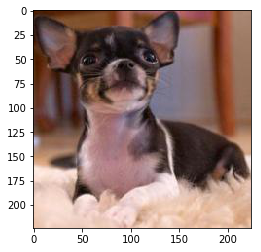

In [19]:
dog_prediction("/Users/juliagoyco/Desktop/Final_Deep_Learning/Images/n02085620-Chihuahua/n02085620_368.jpg")

In [ ]:
#display_image("/Users/juliagoyco/Desktop/Final_Deep_Learning/Images/n02085620-Chihuahua/n02085620_368.jpg")

(224, 224, 3)
(1, 224, 224, 3)
(1, 7, 7, 2048)
What a cute... standard_schnauzer ! 


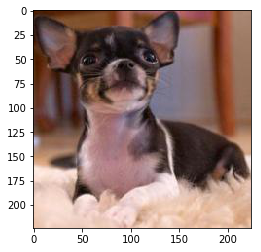

In [20]:
dog_prediction("/Users/juliagoyco/Desktop/Final_Deep_Learning/Images/n02085620-Chihuahua/n02085620_368.jpg")

(224, 224, 3)
(1, 224, 224, 3)
(1, 7, 7, 2048)
What a cute... Japanese_spaniel ! 


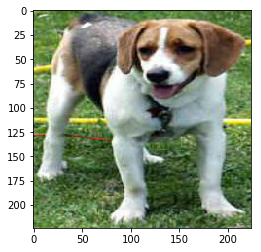

In [14]:
dog_prediction("/Users/juliagoyco/Desktop/Final_Deep_Learning/Images/n02088364-beagle/n02088364_129.jpg")